In [66]:
import numpy as np
from numpy import pi, cos, sin, exp, log, arctan, absolute
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import astropy.coordinates as coord
import astropy.units as u

In [20]:
# define constant
costhMin = cos(120/180*pi)
costhMax = cos(85/180*pi)
Ntheta = 100
Nphi = 10000
rng = np.random.default_rng()

class Detector:
    def __init__(self, longitude, latitude):
        self.lon = longitude
        self.lat = latitude
        self.pol = np.array([pi/2-latitude, longitude])
        self.rec = np.array([sin(self.pol[0]*cos(self.pol[1])), \
                            sin(self.pol[0]*sin(self.pol[1])), \
                            cos(self.pol[0])])

def inRange(theta, phi, detector):
    posSrc = np.array([sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)])
    posDet = detector.rec
    costh = np.dot(posSrc, posDet)
    if costh > costhMin and costh <= costhMax:
        return True
    else:
        return False


In [59]:
scs = Detector(0, 16.8/180*pi)
icecube = Detector(0, -pi/2)
km3net = Detector(0, 37.5/180*pi)

latArr = np.linspace(-pi/2, pi/2, Ntheta)
lonArr = np.linspace(-pi, pi, Ntheta)
ratioArrScs = np.zeros(Ntheta)
ratioArrKm3 = np.zeros(Ntheta)
ratioArrIce = np.zeros(Ntheta)

for i in range(Ntheta):
    phiRndArr = rng.uniform(-pi, pi, Nphi)
    numInScs = numInKm3 = numInIce = 0
    for j in range(Nphi):
        if inRange(pi/2-latArr[i], phiRndArr[j], scs):
            numInScs += 1
        if inRange(pi/2-latArr[i], phiRndArr[j], km3net):
            numInKm3 += 1
        if inRange(pi/2-latArr[i], phiRndArr[j], icecube):
            numInIce += 1
    ratioArrScs[i] = numInScs / Nphi
    ratioArrKm3[i] = numInKm3 / Nphi
    ratioArrIce[i] = numInIce / Nphi
        

In [60]:
ratioDataScs = np.zeros([Ntheta, Ntheta])
ratioDataKm3 = np.zeros([Ntheta, Ntheta])
ratioDataIce = np.zeros([Ntheta, Ntheta])

for i in range(Ntheta):
    for j in range(Ntheta):
        ratioDataScs[i][j] = ratioArrScs[i]
        ratioDataKm3[i][j] = ratioArrKm3[i]
        ratioDataIce[i][j] = ratioArrIce[i]

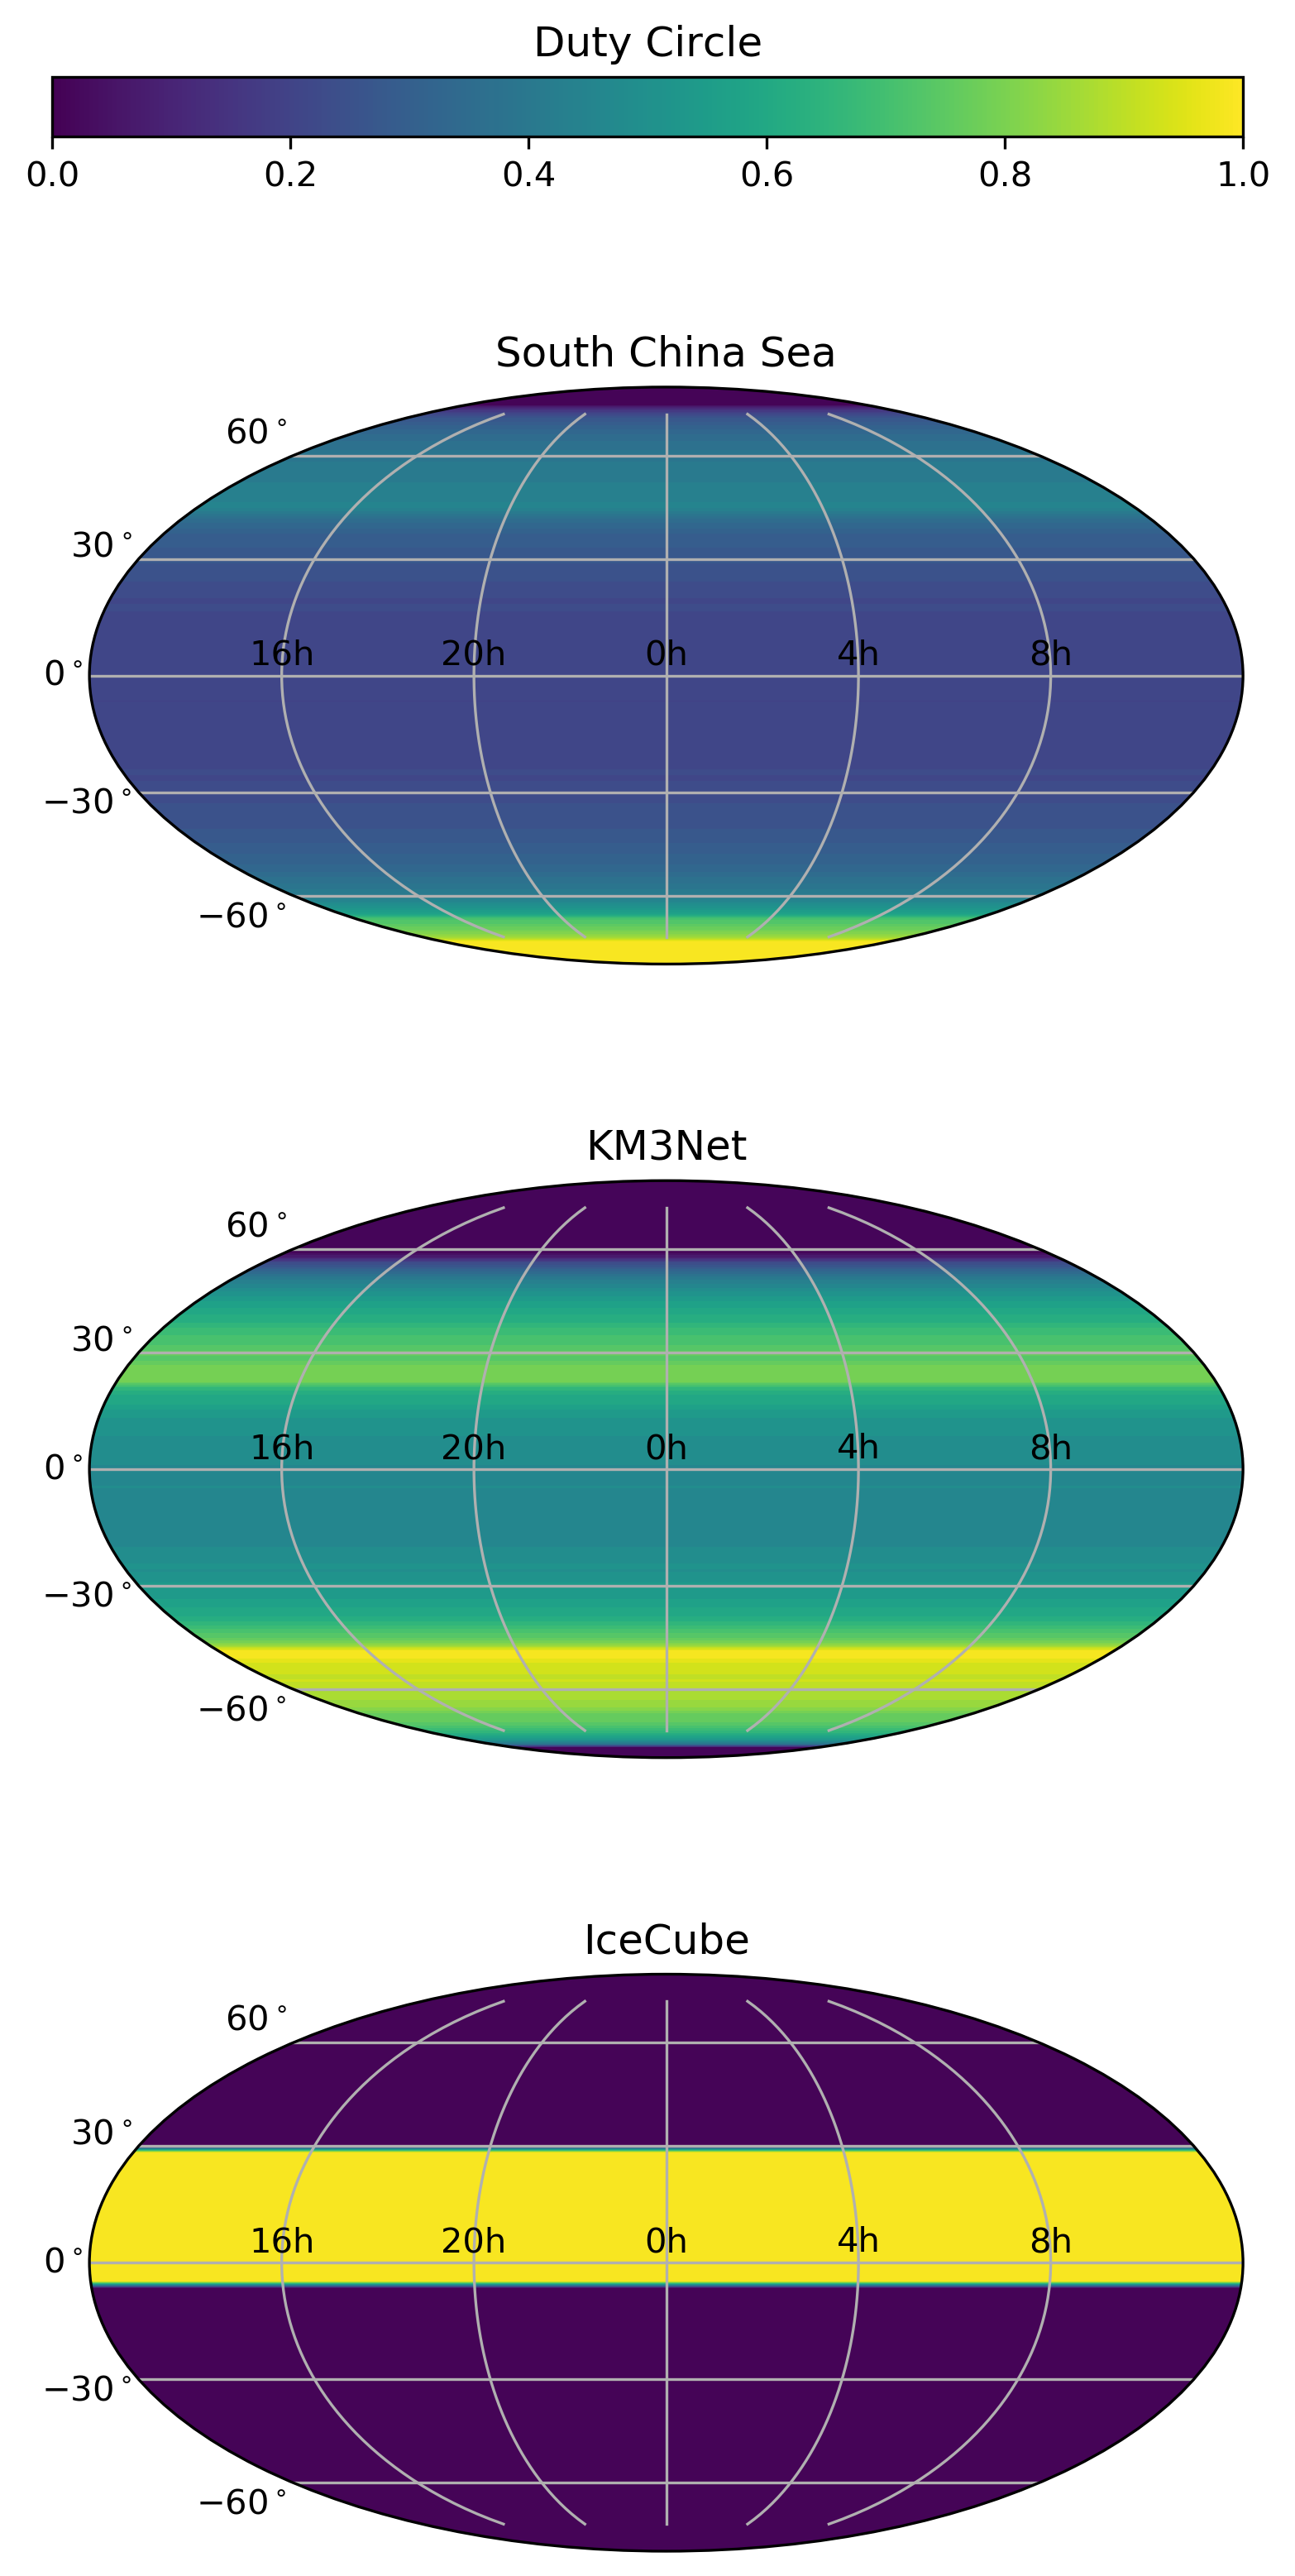

In [75]:
fig = plt.figure(figsize=(6,12), dpi=300)
ax1 = fig.add_subplot(311, projection="mollweide")
ax1.contourf(lonArr, latArr, ratioDataScs, levels=50)
ax2 = fig.add_subplot(312, projection="mollweide")
ax2.contourf(lonArr, latArr, ratioDataKm3, levels=50)
ax3 = fig.add_subplot(313, projection="mollweide")
ax3.contourf(lonArr, latArr, ratioDataIce, levels=50)

#plot color bar
cax = fig.add_axes([0.1, 0.95, 0.8, 0.02])
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(cax, 
                                norm=norm,
                                orientation='horizontal')
cax.set_title('Duty Circle', size = 12)


# config the ax1es
axs = [ax1, ax2, ax3]
names = ['South China Sea', 'KM3Net', 'IceCube']
for [ax, name] in zip(*[axs, names]):
    ax.set_xticks([-pi*2/3, -pi/3, 0, pi/3, pi*2/3])
    ax.set_xticklabels(['16h', '20h', '0h', '4h', '8h'])
    ax.set_yticks([-pi/3, -pi/6, 0, pi/6, pi/3])
    ax.set_yticklabels([r'$-60^\circ$', r'$-30^\circ$', r'$0^\circ$', r'$30^\circ$', r'$60^\circ$'])
    ax.grid(True)
    ax.set_title(name)
fig.savefig("scsDuty.pdf")
fig.savefig("scsDuty.png")

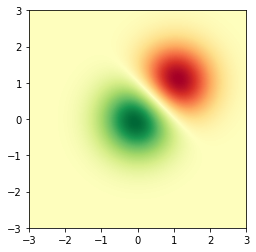

In [39]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()


In [40]:
Z

array([[ 3.04599342e-08,  3.53672816e-08,  4.10139437e-08, ...,
         4.19694495e-08,  3.59915557e-08,  3.08143049e-08],
       [ 3.53672816e-08,  4.10652432e-08,  4.76216291e-08, ...,
         4.84016714e-08,  4.14911034e-08,  3.55076995e-08],
       [ 4.10139437e-08,  4.76216291e-08,  5.52247930e-08, ...,
         5.57277946e-08,  4.77509785e-08,  4.08463455e-08],
       ...,
       [ 4.19694495e-08,  4.84016714e-08,  5.57277946e-08, ...,
        -1.20875533e-03, -1.09715357e-03, -9.94611576e-04],
       [ 3.59915557e-08,  4.14911034e-08,  4.77509785e-08, ...,
        -1.09715357e-03, -9.95855618e-04, -9.02780992e-04],
       [ 3.08143049e-08,  3.55076995e-08,  4.08463455e-08, ...,
        -9.94611576e-04, -9.02780992e-04, -8.18405195e-04]])

In [63]:
a = [1, 2, 3]
b = [10, 20, 30]
for [aa, bb] in zip(*[a, b]):
    print(aa)
    print(bb)

1
10
2
20
3
30


In [57]:
c = 1

In [58]:
a

0